In [1]:
from izzy.datasets import random_modeling_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from tqdm import tqdm

In [2]:
# Number of observations
n_observations = 1000000

# Number of predictors
n_predictors = 5

# Class balances
class_balances = np.arange(0.1, 1.0, 0.1)

thresholds = np.arange(0.0, 1.05, 0.05)

In [3]:
# 
auc = []
accuracy = []
for class_balance in tqdm(class_balances):   
    # Create dataset
    df = random_modeling_dataset(n_observations, n_predictors, class_balance)

    # Build models
    x = df[['feature0', 'feature1', 'feature2']]
    y = df['outcome']
    
    logit = LogisticRegression()  #class_weight='balanced')
    logit.fit(x, y)
    
    y_pred = logit.predict_proba(x)[:, 1]
    
    # Get performance
    auc.append(roc_auc_score(y, y_pred))

    # Compute accuracy vs threshold
    accuracy_ = []
    for threshold in thresholds:
        accuracy_.append(accuracy_score(y, y_pred >= threshold))
    accuracy.append(accuracy_)
        

100%|██████████| 9/9 [01:00<00:00,  6.76s/it]


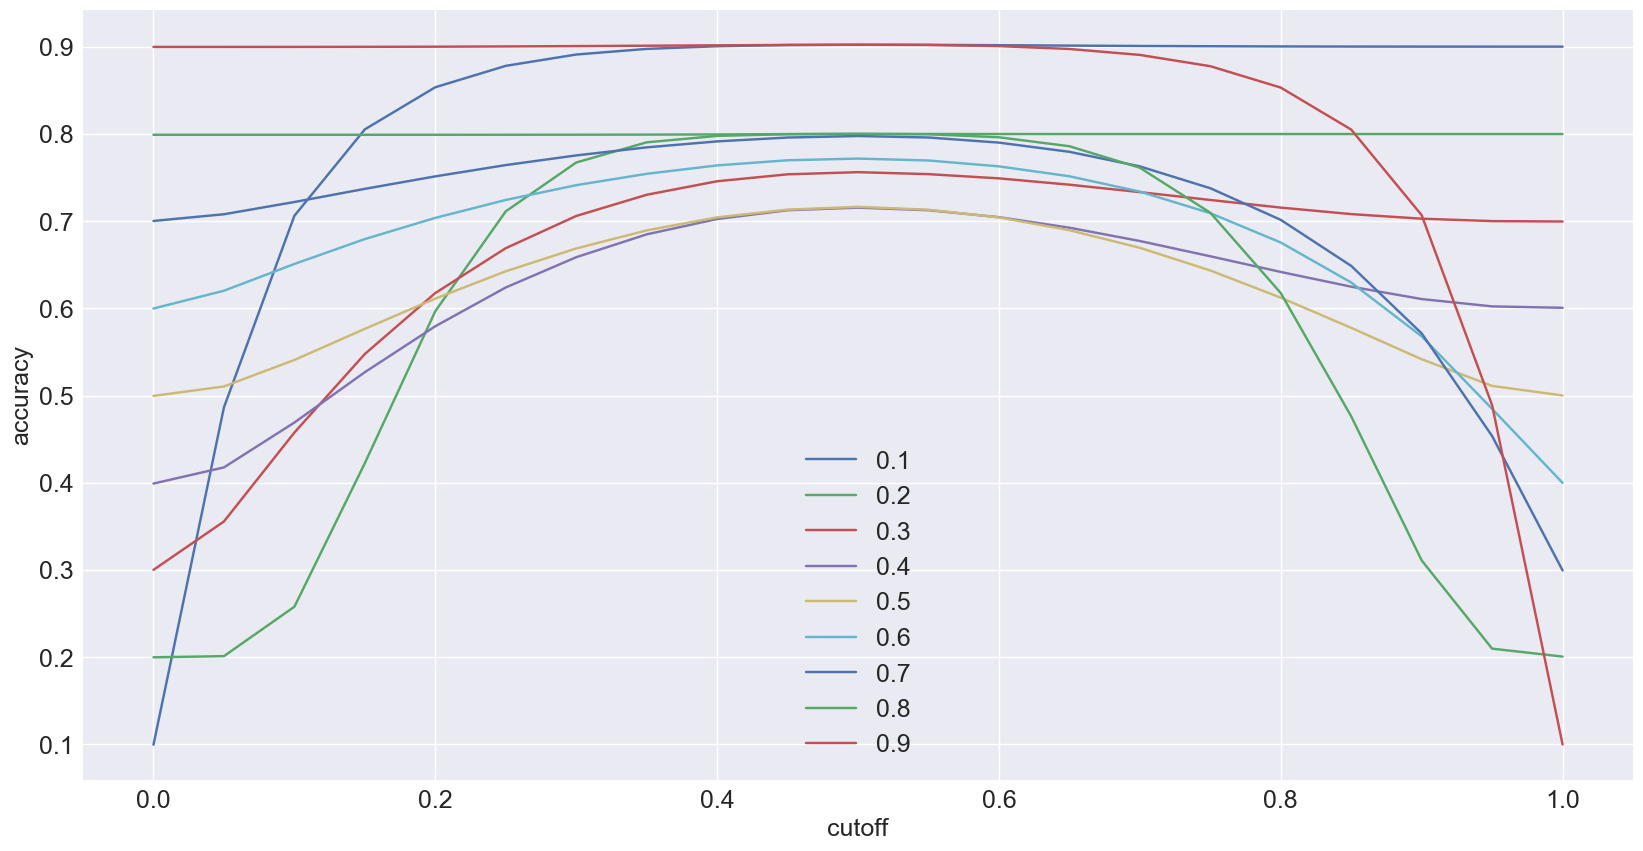

In [4]:
        
# Plot
plt.figure(figsize=(20, 10))
for class_balance, accuracy_ in zip(class_balances, accuracy):
    plt.plot(thresholds, accuracy_, label=str(np.round(class_balance, 1)))
plt.xlabel('cutoff')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [5]:
# 
auc = []
accuracy = []
for class_balance in tqdm(class_balances):   
    # Create dataset
    df = random_modeling_dataset(n_observations, n_predictors, class_balance)

    # Build models
    x = df[['feature0', 'feature1', 'feature2']]
    y = df['outcome']
    
    logit = LogisticRegression(class_weight='balanced')
    logit.fit(x, y)
    
    y_pred = logit.predict_proba(x)[:, 1]
    
    # Get performance
    auc.append(roc_auc_score(y, y_pred))

    # Compute accuracy vs threshold
    accuracy_ = []
    for threshold in thresholds:
        accuracy_.append(accuracy_score(y, y_pred >= threshold))
    accuracy.append(accuracy_)
        

100%|██████████| 9/9 [01:38<00:00, 10.94s/it]


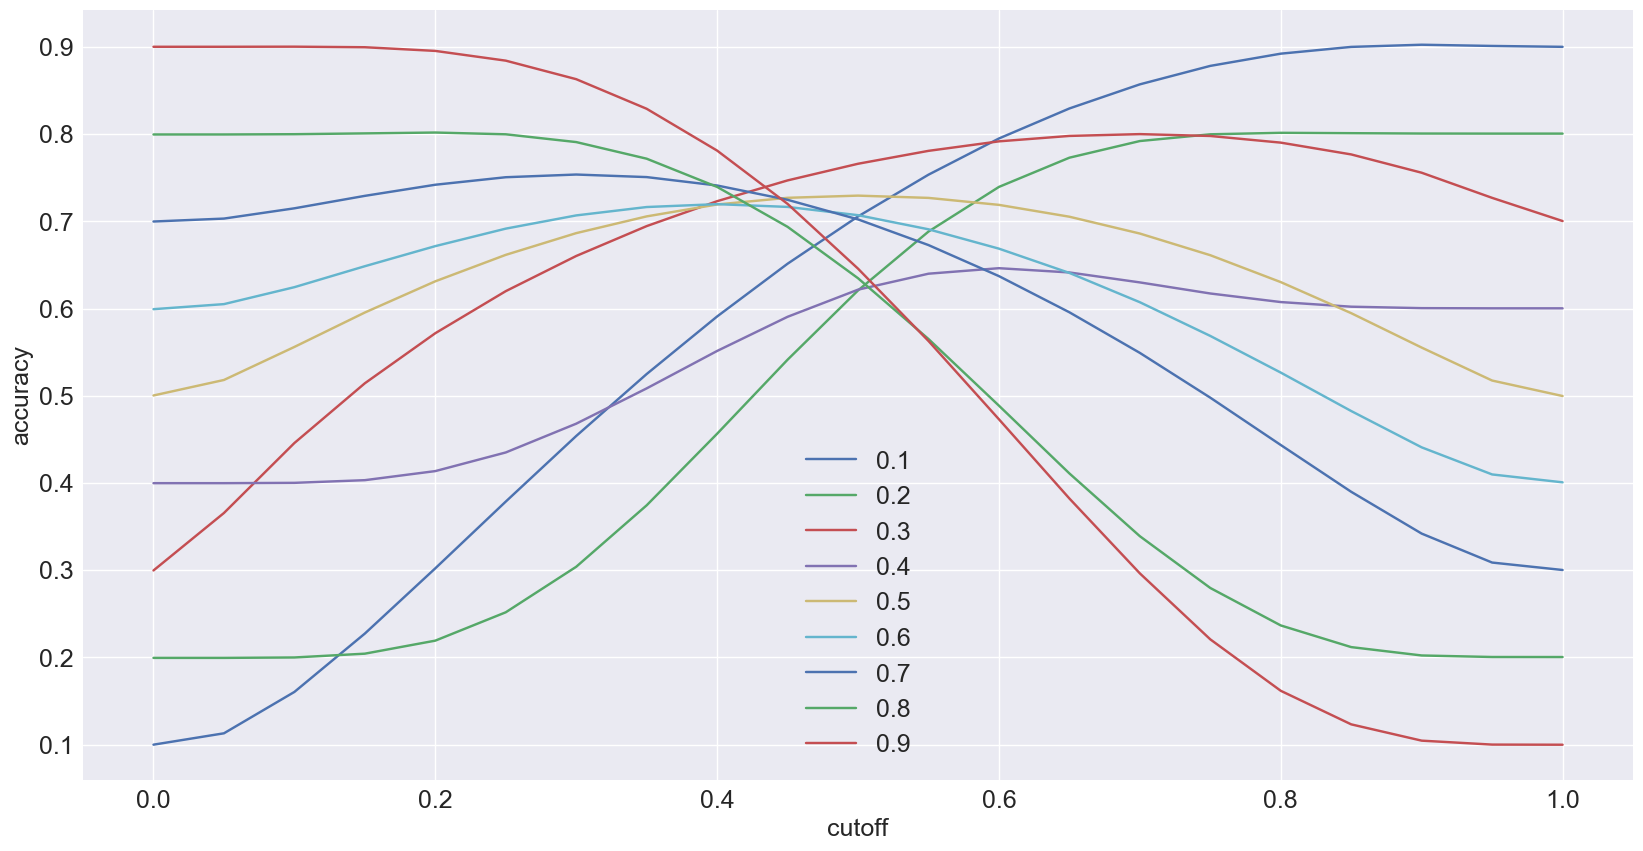

In [6]:
        
# Plot
plt.figure(figsize=(20, 10))
for class_balance, accuracy_ in zip(class_balances, accuracy):
    plt.plot(thresholds, accuracy_, label=str(np.round(class_balance, 1)))
plt.xlabel('cutoff')
plt.ylabel('accuracy')
plt.legend()
plt.show()

